# Quantitative Finance Applications using Python

In [1]:
# importing the main libraries (the rest of the libraries will be imported along the way)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import requests


In [2]:
import importlib
import quant_finance_functions
importlib.reload(quant_finance_functions)

<module 'quant_finance_functions' from 'd:\\GitHUB\\quant-finance\\quant-finance\\quant_finance_functions.py'>

First example is regarding an ARMA model using self-generated data

In [3]:
import numpy as np
import pandas as pd

np.random.seed(1)
n = 365
time = pd.date_range(start = '2022-01-01', periods = n, freq='D')
random_walk = np.cumsum(np.random.normal(0,1, size = n))
daily_return = np.random.normal(-0.01 , 0.01, size = n)

value = 100 + 75 * (0.2*random_walk + 0.8*np.cumsum(daily_return))
value = np.maximum(value, 50)  # Ensure value does not go below 50
data = pd.DataFrame({'Value': value, "Time": time}, index=time)

data.head()


,Value,Time
2022-01-01,124.201869,2022-01-01
2022-01-02,114.734567,2022-01-02
2022-01-03,104.542470,2022-01-03
2022-01-04,88.198728,2022-01-04
2022-01-05,100.774407,2022-01-05


Once the data is generated, this three steps are the most basic ones to be taken:
 - Visualizing
 - Generating summary statistics
 - Checking the stationarity assumption of the time-series values

To do these three tasks, quant_finance_functions.py file contains plot_time_series, time_series_summary, and check_stationarity functions to automatically carry out the process. This can be useful if the tasks are repetitive, which is so in most cases. 

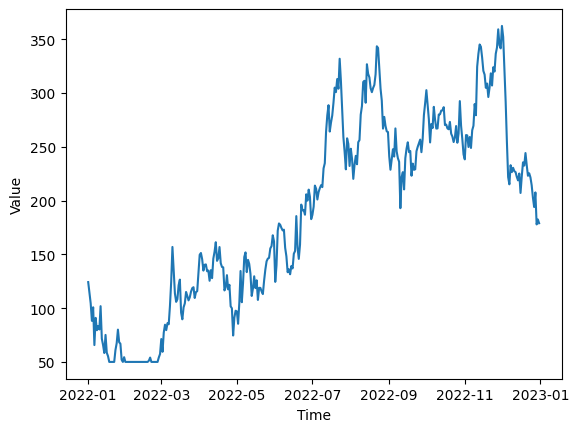

In [4]:
from quant_finance_functions import plot_time_series
plot_time_series(data['Time'], data['Value'] )


In [5]:
from quant_finance_functions import time_series_summary
time_series_summary(data['Value'])

,count,mean,std,min,25%,50%,75%,max
0,365,188.072093,88.163066,50.0,115.334419,194.326376,262.169277,362.318411


The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine whether a time series is stationary or non-stationary. A stationary time series is one in which the statistical properties such as the mean, variance, and autocorrelation do not change over time. A non-stationary time series, on the other hand, has statistical properties that change over time, such as a trend or seasonality.

The ADF test is a modification of the Dickey-Fuller test, which tests for the presence of a unit root in a time series. A unit root is a root of the autoregressive characteristic equation that is equal to 1. If a time series has a unit root, it is non-stationary. The ADF test adds additional terms to the Dickey-Fuller test regression equation to account for higher-order autocorrelations in the data.

The ADF test involves estimating a regression equation of the form:

Δy(t) = α + βt + γy(t-1) + ΣδiΔy(t-i) + ε(t)

where:

Δy(t) is the first difference of the time series.
α is a constant.
β is the coefficient of time.
γ is the coefficient of lagged y.
ΣδiΔy(t-i) is the sum of the coefficients of the lagged differences.
ε(t) is the error term.

The null hypothesis of the ADF test is that the time series has a unit root, which means it is non-stationary. The test calculates a p-value, and if the p-value is less than the significance level (usually 0.05), then the null hypothesis is rejected, and the data is considered to be stationary. If the p-value is greater than or equal to the significance level, then the null hypothesis is not rejected, and the data is considered to be non-stationary.

If the data is non-stationary, it may be necessary to apply a transformation or differencing to make it stationary before using it as input to a time series model.

In [6]:
from quant_finance_functions import check_stationarity

In [7]:
check_stationarity(data)

'ADF test p-value: 0.4908\nThe null hypothesis of the ADF test (that the time series is non-stationary) cannot be rejected at the 5% level, indicating that the data is non-stationary.'

Now we have three fundamental steps covered, we can move on to the more advanced operations using time series data. This time, let's import the real data using API-based data sources. To do that, the relevant library for Yahoo Finance needs to be installed. 

 pip install yfinance

Running the code above on your terminal, you can install the library.

In [8]:
del data

In [13]:
import pandas as pd
import yfinance as yf

# Download the data for the past year
data = yf.download("AAPL", start="2022-01-01", end="2022-12-31")

# Set column names for the DataFrame
data.columns = [ "open", "high", "low", "close", "adj_close", "volume"]

# Convert date column to datetime type
data["date"] = pd.to_datetime(data.iloc[:,0])
data

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,adj_close,volume,date
Date,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.683868,104487900,1970-01-01 00:00:00.000000177
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.390701,99310400,1970-01-01 00:00:00.000000182
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.645523,94537600,1970-01-01 00:00:00.000000179
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.746811,96904000,1970-01-01 00:00:00.000000172
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.915573,86709100,1970-01-01 00:00:00.000000172
...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900,1970-01-01 00:00:00.000000130
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800,1970-01-01 00:00:00.000000131
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400,1970-01-01 00:00:00.000000129


In [14]:
data['date']

Date
2022-01-03   1970-01-01 00:00:00.000000177
2022-01-04   1970-01-01 00:00:00.000000182
2022-01-05   1970-01-01 00:00:00.000000179
2022-01-06   1970-01-01 00:00:00.000000172
2022-01-07   1970-01-01 00:00:00.000000172
                          ...             
2022-12-23   1970-01-01 00:00:00.000000130
2022-12-27   1970-01-01 00:00:00.000000131
2022-12-28   1970-01-01 00:00:00.000000129
2022-12-29   1970-01-01 00:00:00.000000127
2022-12-30   1970-01-01 00:00:00.000000128
Name: date, Length: 251, dtype: datetime64[ns]

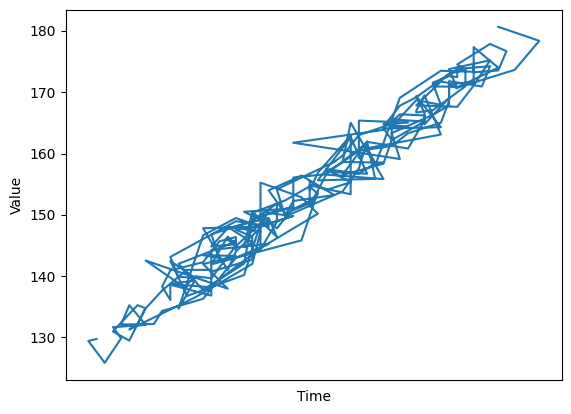

In [15]:
plot_time_series( data['date'], data['adj_close'])

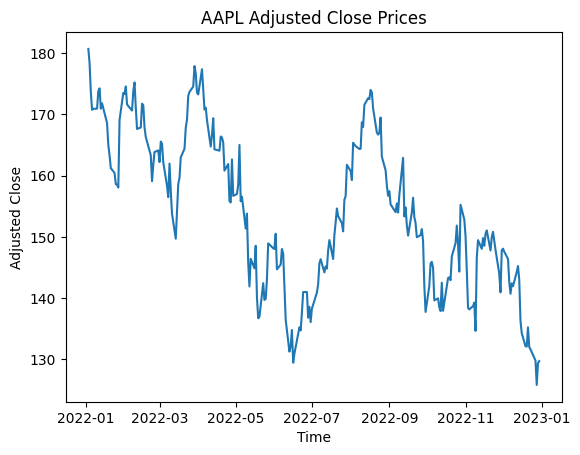

In [18]:
import matplotlib.pyplot as plt

# Plot the time series of the Adjusted Close values
plt.plot(data.index, data['adj_close'])
plt.xlabel('Time')
plt.ylabel('Adjusted Close')
plt.title('AAPL Adjusted Close Prices')
plt.show()
